A/B Testing: Free Shipping Threshold impact on Average Order Value(AOV)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Make plots display inside the notebook
%matplotlib inline

 Simulate Data

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Control group: $30 free shipping threshold
n_control = 500
aov_control = np.random.normal(loc=40, scale=10, size=n_control)
aov_control = np.clip(aov_control, 5, None)

# Variant group: $50 free shipping threshold
n_variant = 500
aov_variant = np.random.normal(loc=45, scale=10, size=n_variant)
aov_variant = np.clip(aov_variant, 5, None)

# Combine into DataFrame
data = pd.DataFrame({
    'group': ['Control'] * n_control + ['Variant'] * n_variant,
    'order_value': np.concatenate([aov_control, aov_variant])
})

data.head()

,group,order_value
0,Control,44.967142
1,Control,38.617357
2,Control,46.476885
3,Control,55.230299
4,Control,37.658466


Summary Statistics

In [3]:
summary = data.groupby('group')['order_value'].agg(['count', 'mean', 'std'])
summary

,count,mean,std
group,,,
Control,500,40.068380,9.812532
Variant,500,45.318261,9.779972


Perform t-test

In [4]:
t_stat, p_value = ttest_ind(aov_control, aov_variant, equal_var=False)

print(f"T-test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-test Statistic: -8.4734
P-value: 0.0000


Visualize the Results

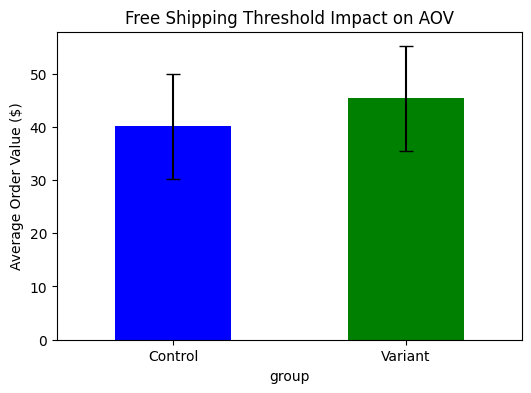

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
summary['mean'].plot(kind='bar', yerr=summary['std'], capsize=5, color=['blue', 'green'], ax=ax)
ax.set_ylabel('Average Order Value ($)')
ax.set_title('Free Shipping Threshold Impact on AOV')
plt.xticks(rotation=0)
plt.show()

Conclusion

In [6]:
if p_value < 0.05:
    print("✅ Statistically significant difference in AOV: Raising the free shipping threshold likely increased customer spend.")
else:
    print("❌ No statistically significant difference in AOV: Raising the free shipping threshold did not show clear impact.")


✅ Statistically significant difference in AOV: Raising the free shipping threshold likely increased customer spend.
